In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,8

I am trying to check a [formula](http://mathoverflow.net/questions/219705/any-ways-to-simplify-daboussis-argument-for-prime-number-theorem) I found on the internet.  Since nobody help me, maybe I can check with a computer.

$$  \limsup_{x \to \infty} \underbrace{\frac{1}{x}\sum_{n \leq x} \mu(x)}_{\color{red}{A}}\leq 
\prod_{p \leq y} \left( 1 - \frac{1}{p}\right)
\int_1^\infty \underbrace{ \frac{1}{t}\sum_{n \leq t} \mu(n)\mathbf{1}_y(n)}_{\color{blue}{B}} \times \frac{dt}{t} $$

In [2]:
import time
import numpy as np

t = time.time()

N = 1000000
x = np.zeros(N).astype(int)
x[0] = 1
x[1] = 1

p = 0
while( p < np.sqrt(N)):
    p = p + 1
    while(x[p] == 1):
        p += 1
    x[2*p::p] = 1
    
P = np.where(x == 0)[0]

for k in 1+np.arange(100-1):
    print k,
    x = np.zeros(N).astype(int)
    for p in P[P < np.sqrt((k+1)*N)]:
        if( (k*N)% p == 0):
            x[0] = 1
        x[ p - (k*N % p)::p] = 1

    P = np.hstack((P, np.where(x == 0)[0] + k*N))

print time.time() - t
P.shape

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 4.44349384308


(5761455,)

Let's compute the Mobius function $\mu$ up to $n = 100000$.  Let's remember what the Möbius function says:

$$ \mu\big(n=p_1\dots p_k \big) =  \left\{ \begin{array}{rl}
-1 &  k\text{ is odd} \\
0 & \text{if }n \equiv 0 \text{ mod } p^2 \\
1 & k\text{ is even}
\end{array} \right.$$

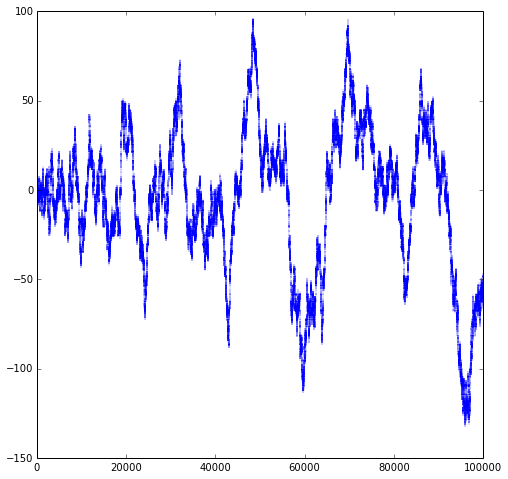

In [24]:
N = 100000
x = np.zeros(N).astype(int) + 1

for p in P[P < N]:
    x[::p]    *= -1
    x[::p**2] *=  0

plt.plot(np.cumsum(x), '.', markersize=0.5)

In [23]:
# http://stackoverflow.com/questions/32156248/how-do-i-set-custom-css-for-my-ipython-ihaskell-jupyter-notebook

from IPython.core.display import HTML
HTML("""
<style>
span.kernel_indicator_name {font-size: 12px;}
div p { font-size: 20px; }
</style>
""")

#kernel_indicator > span
#notebook-container > div.cell.text_cell.rendered.selected > div.inner_cell > div.text_cell_render.rendered_html

Let's verify [Mertens](http://blogs.ethz.ch/kowalski/2009/04/25/the-mertens-formula/) formula:

$$ \prod_{p < x} \left( 1 - \frac{1}{p} \right) \propto \frac{1}{\log x} $$

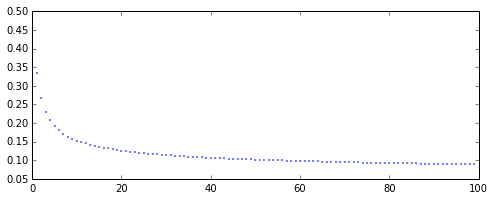

In [36]:
plt.rcParams['figure.figsize'] = 8,3
plt.plot(np.cumproduct(1 - 1.0/P[:100]), '.', markersize=2)

In order to get a fit... we need to find the constant of portionality.  We know that:

$$ \prod_{p < x} \left( 1 - \frac{1}{p} \right) \approx \frac{e^{-\gamma}}{\log x} $$

Someone really critical or fastidious is going to ask what "$\approx$".  This happens in real life to... please let's just say they are **close**.

What exactly is $\gamma$?  We could try to add up the Harmonic series, which gradually tends to infinity:
$$ 1 + \frac{1}{2} + \frac{1}{3} + \dots \approx \int_1^n \frac{dx}{x}  = \log n$$
This series **diverges** which makes mathematicians upset - but not some physicists!  Someone quickly noticed the difference approaches a number:
$$ 1 + \frac{1}{2} + \frac{1}{3} + \dots \frac{1}{n} - \log n = 0.577\dots $$
This is one of the more ridiculous constants in my opinion, but it's there and place some role in nature.

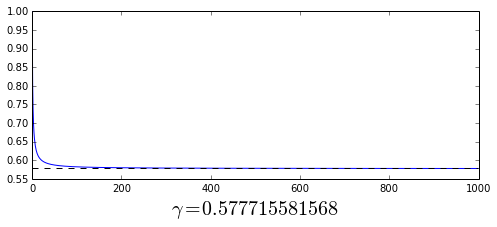

In [46]:
N = 1000
n = 1+ np.arange(N)

plt.rcParams['figure.figsize'] = 8,3
plt.plot(np.cumsum(1.0/n) - np.log(n))

gamma = np.sum(1.0/n) - np.log(N)

plt.plot( 0*n + gamma, 'k--')

plt.xlabel( "$\gamma = " + str(gamma) +  "$", fontsize=20)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


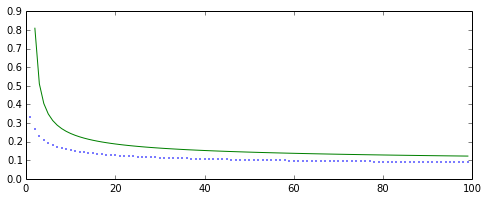

In [52]:
plt.rcParams['figure.figsize'] = 8,3
plt.plot(np.cumproduct(1 - 1.0/P[:100]), '.', markersize=2)

t = np.arange(100)
plt.plot( np.exp(-gamma)/np.log(t) )

A very precise version of Mertens' theorem checks the constant:

$$ \prod_{p < x} \left( 1 - \frac{1}{p} \right) \approx \frac{e^{-\gamma}}{\log x} $$

We can rearrange the terms to find a reasonable way to ind the error:


$$ \log x \prod_{p < x} \left( 1 - \frac{1}{p} \right) \approx e^{-\gamma} $$

(0.9, 1.1)

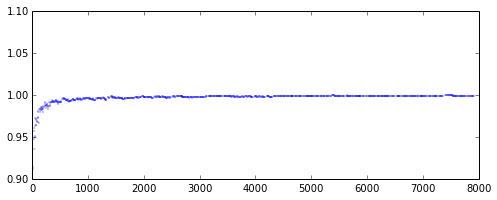

In [62]:
N = 1000
n = 1+ np.arange(N)


plt.rcParams['figure.figsize'] = 8,3
plt.plot(P[:1000], np.exp(gamma)*np.log(P[:1000])*np.cumproduct(1 - 1.0/P[:1000]), '.', markersize=1)

plt.ylim([0.9, 1.1])

(0.99, 1.01)

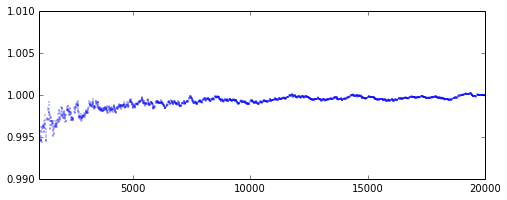

In [69]:
plt.rcParams['figure.figsize'] = 8,3
plt.plot(P[:N], np.exp(gamma)*np.log(P[:N])*np.cumproduct(1 - 1.0/P[:N]), '.', markersize=1)

plt.xlim([1000,20000])
plt.ylim([0.99, 1.01])

OK.  Using a computer we have examined Mertens formula to an accuracy never dream of by the mathematicians who stated it.  Our goal... is to **prove** the prime number theorme.  This is substantially more difficutl than Mertens formula.


$$  \limsup_{x \to \infty} \underbrace{\frac{1}{x}\sum_{n \leq x} \mu(x)}_{\color{red}{A}}\leq 
\color{#4D4}{\prod_{p \leq y} \left( 1 - \frac{1}{p}\right)}
\int_1^\infty \underbrace{ \frac{1}{t}\sum_{n \leq t} \mu(n)\mathbf{1}_y(n)}_{\color{blue}{B}} \times \frac{dt}{t} $$

We now understand the green part.  In a later revision of this file, I'll come back and fix the rest.